<a href="https://colab.research.google.com/github/Nirmala-debug/CN6005AI/blob/main/week5_with_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from tensorflow.keras.layers import BatchNormalization,Flatten,Dropout,Dense,Conv2D,MaxPooling2D
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Loading the MNIST dataset
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

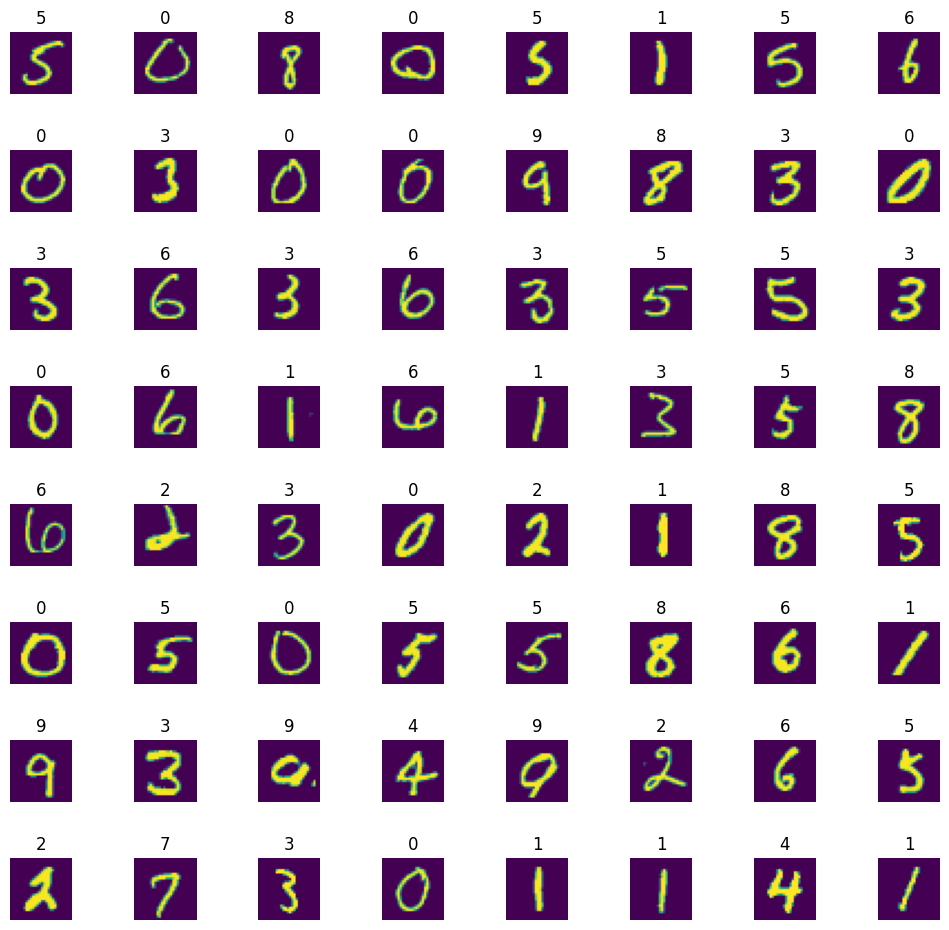

In [ ]:
 #Display some images
from sklearn.utils import shuffle
def showImages(num_row,num_col,X,Y):
    import matplotlib.pyplot as plt


    (X_rand, Y_rand) = shuffle(X, Y)

    fig, axes = plt.subplots(num_row,num_col,figsize = (12,12))
    axes = axes.ravel()
    for i in range(0, num_row*num_col):
        axes[i].imshow(X_rand[i])
        axes[i].set_title("{}".format(Y_rand.item(i)))
        axes[i].axis('off')
        plt.subplots_adjust(wspace =1)

    return
num_row = 8
num_col = 8
showImages(num_row,num_col,X =X_train,Y = y_train)

In [ ]:
# Preprocessing the dataset
X_train = X_train / 255
X_test = X_test / 255
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
model=Sequential()
# model.add(Flatten(input_shape=(28,28)))
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1),kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size = 4, activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,validation_split=0.2,epochs=5,batch_size=64)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 226s 293ms/step - accuracy: 0.8497 - loss: 0.4858 - val_accuracy: 0.9797 - val_loss: 0.0659
Epoch 2/5
582/750 ━━━━━━━━━━━━━━━━━━━━ 46s 276ms/step - accuracy: 0.9778 - loss: 0.0723

KeyboardInterrupt: 

In [ ]:
# Evaluating the model
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9759 - loss: 0.0731
Test accuracy: 0.9800999760627747


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step


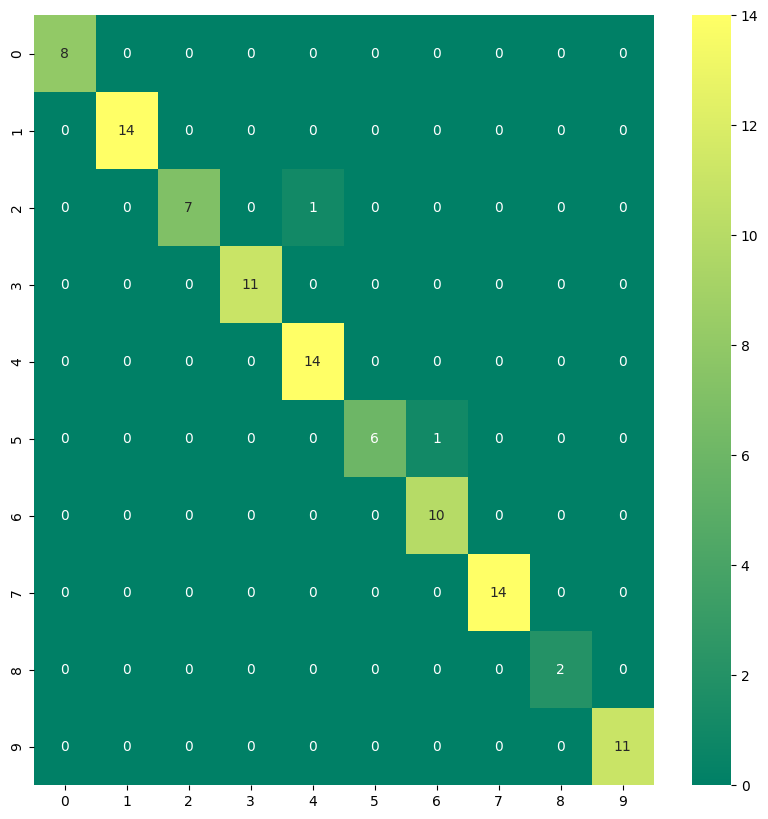

In [ ]:
predictions=model.predict(X_test[1:100])
predictions=np.argmax(predictions,axis=1)
plt.figure(figsize=(10,10))
cm=confusion_matrix(y_test[1:100],predictions)
ax= plt.subplot()
sns.heatmap(cm, annot=True,cmap='summer', fmt='g', ax=ax);

In [ ]:
print(X_test[1:5].shape)

(4, 28, 28, 1)


In [ ]:
print(predictions.shape)
print(y_test.shape)

(99,)
(10000,)


part 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

# Load and preprocess MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# Build CNN model using Functional API
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name='last_conv')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = Model(inputs, outputs)

# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Grad-CAM function
def compute_gradcam(model, image, label_index, layer_name='last_conv'):
    grad_model = Model(inputs=model.inputs,
                       outputs=[model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        inputs = tf.cast(tf.expand_dims(image, axis=0), tf.float32)
        conv_outputs, predictions = grad_model(inputs)
        loss = predictions[:, label_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.8904 - loss: 0.3424 - val_accuracy: 0.9887 - val_loss: 0.0433
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 61s 36ms/step - accuracy: 0.9859 - loss: 0.0449 - val_accuracy: 0.9873 - val_loss: 0.0439
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9870 - val_loss: 0.0413
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9860 - val_loss: 0.0467
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.9943 - loss: 0.0172 - val_accuracy: 0.9887 - val_loss: 0.0374


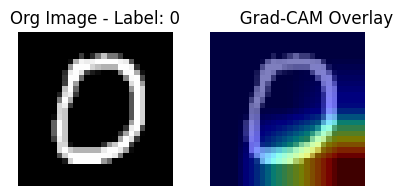

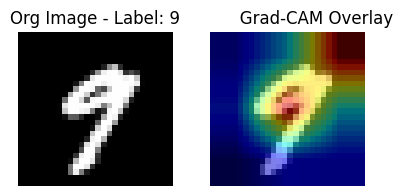

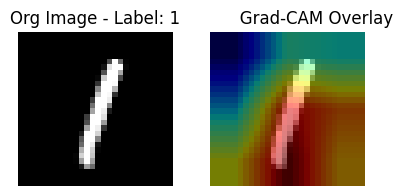

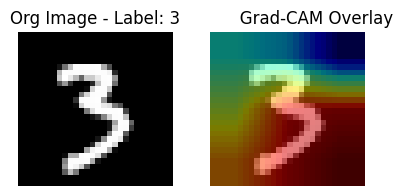

In [ ]:
#Visualize Grad-CAM
image_index = [10, 20, 5, 30]
ro = 0
for i in image_index:
  image = X_test[i]
  label = y_test[i]
  ro+=1
  heatmap = compute_gradcam(model, image, label)
# Resize heatmap to match input image
  heatmap_resized = tf.image.resize(heatmap[..., tf.newaxis], [28, 28]).numpy().squeeze()
  plt.figure(figsize=(4, 2))
  plt.subplot(1, 2, 1)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(f"Org Image - Label: {label}")
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)
  plt.title("           Grad-CAM Overlay")
  plt.axis('off')
  plt.tight_layout()
  plt.show()

The portfolio exercise for this week is to use the following dataset
from keras and develop two model one with Pooling and one without
pooling and compare the accuracies:
CIFAR is the dataset provided by the Keras.
• Fom tensorflow.keras.datasets import cifar10
• (X_train, y_train), (X_tes


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,098 (629.29 KB)

 Trainable params: 160,650 (627.54 KB)

 Non-trainable params: 448 (1.75 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,171,146 (42.61 MB)

 Trainable params: 11,170,698 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 130ms/step - accuracy: 0.3985 - loss: 1.7338 - val_accuracy: 0.5395 - val_loss: 1.3861
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 124ms/step - accuracy: 0.5953 - loss: 1.1343 - val_accuracy: 0.6447 - val_loss: 0.9948
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.6674 - loss: 0.9511 - val_accuracy: 0.6453 - val_loss: 1.0086
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 128ms/step - accuracy: 0.7095 - loss: 0.8264 - val_accuracy: 0.6909 - val_loss: 0.8948
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 124ms/step - accuracy: 0.7416 - loss: 0.7315 - val_accuracy: 0.6625 - val_loss: 0.9961
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 124ms/step - accuracy: 0.7691 - loss: 0.6562 - val_accuracy: 0.6957 - val_loss: 0.8802
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 122ms/step - accuracy: 0.7924 - loss: 0.5910 - val_accuracy: 0.7191 - val_loss: 0.8519
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 121ms/step - accuracy: 0.8107 - 

NameError: name 'history_no_pooling' is not defined

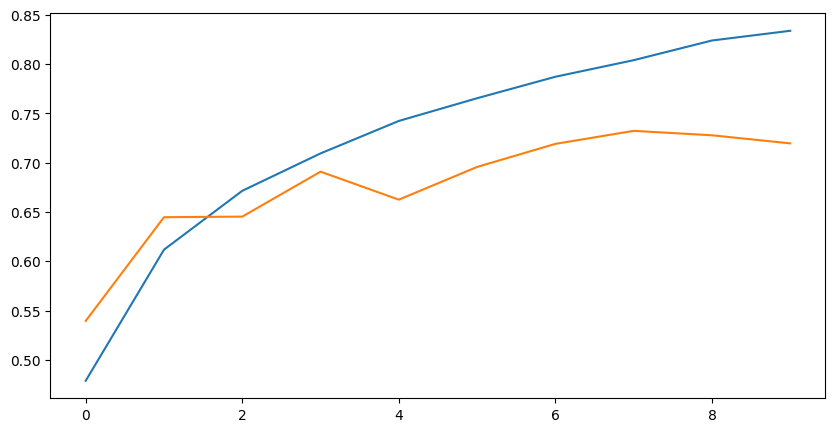

In [ ]:
#Step 1: Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
#Step 2: Load and preprocess CIFAR-10 dataset
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

#step 3: Build CNN model with Pooling
def build_model_with_pooling():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), kernel_initializer='he_normal'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create model
model_pooling = build_model_with_pooling()
model_pooling.summary()
#Step 4: Build CNN model without Pooling
def build_model_no_pooling():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3), kernel_initializer='he_normal'),
        BatchNormalization(),

        Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'),
        BatchNormalization(),

        Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal'),
        BatchNormalization(),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create model
model_no_pooling = build_model_no_pooling()
model_no_pooling.summary()
#Step 5: Train both models
# Train model with pooling
history_pooling = model_pooling.fit(X_train, y_train_cat,
                                    epochs=10, batch_size=64,
                                    validation_data=(X_test, y_test_cat))

# Train model without pooling
#history_no_pooling = model_no_pooling.fit(X_train, y_train_cat, epochs=10, batch_size=64,validation_data=(X_test, y_test_cat)
#Step 6: Evaluate and compare accuracies
# Evaluate on test set
acc_pooling = model_pooling.evaluate(X_test, y_test_cat, verbose=0)[1]
acc_no_pooling = model_no_pooling.evaluate(X_test, y_test_cat, verbose=0)[1]

print(f"Accuracy with Pooling: {acc_pooling:.4f}")
print(f"Accuracy without Pooling: {acc_no_pooling:.4f}")
#Step 7: Plot training and validation accuracy
plt.figure(figsize=(10,5))
plt.plot(history_pooling.history['accuracy'], label='Train Pooling')
plt.plot(history_pooling.history['val_accuracy'], label='Val Pooling')
plt.plot(history_no_pooling.history['accuracy'], label='Train No Pooling')
plt.plot(history_no_pooling.history['val_accuracy'], label='Val No Pooling')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy Comparison')
plt.legend()
plt.show()


# Predictions from model with pooling
preds = np.argmax(model_pooling.predict(X_test), axis=1)
y_true = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(y_true, preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Pooling Model)')
plt.show()



In [ ]:
# Train model WITH pooling
history_pooling = model_pooling.fit(
    X_train,
    y_train_cat,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test_cat)
)

# Train model WITHOUT pooling
history_no_pooling = model_no_pooling.fit(
    X_train,
    y_train_cat,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test_cat)
)


NameError: name 'model_pooling' is not defined

NameError: name 'history_no_pooling' is not defined

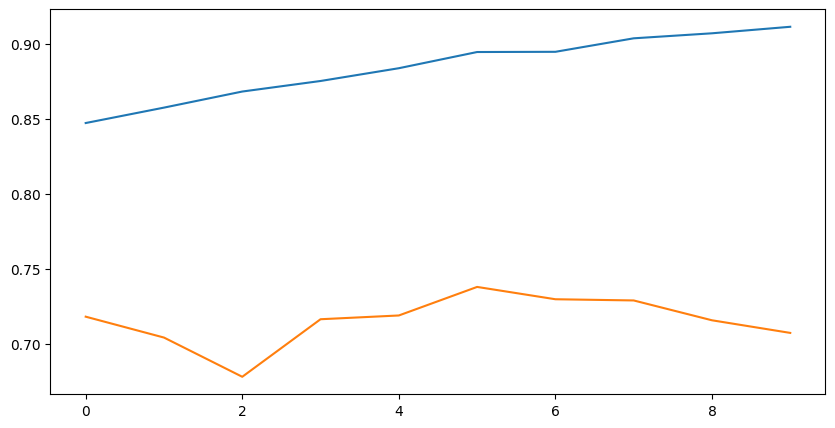

In [ ]:
# Compare training accuracy
plt.figure(figsize=(10,5))
plt.plot(history_pooling.history['accuracy'], label='Train Pooling')
plt.plot(history_pooling.history['val_accuracy'], label='Val Pooling')
plt.plot(history_no_pooling.history['accuracy'], label='Train No Pooling')
plt.plot(history_no_pooling.history['val_accuracy'], label='Val No Pooling')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy Comparison')
plt.legend()
plt.show()
